# KNN (K-Nearest Neighbors)

#### intuition

Step1: neighbor 수(K) 정하기  
Step2: label이 할당되지 않은 하나의 data point를 기준으로 distnace(e.g. Euclidean distance)가 가까운 K개의 인접 데이터를 추출한다.  
Step3: K개의 인접한 데이터가 각각 어떤 label에 해당하는지 수를 확인한다.  
Step4: 가장 많은 인접데이터가 있는 label으로 data point의 label을 할당한다.

특징
- 비모수 알고리즘(모집단에 대한 가정이 없음)  
- K = sqrt(train set sample number)
  - K가 작을 수록 이상치에 민감하게 반응

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Example
Purchased vs. Age, EstimatedSalary

### Step1: Load Dataset

In [2]:
# 'Social_Network_Ads.csv' 파일 읽기 pd.read_csv()
# df shape 확인 


df = pd.read_csv('Social_Network_Ads.csv')
df.shape

(400, 3)

In [3]:
# df head 행 보기

df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# df descriptive statistics

df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Step2: Visualize Dataset

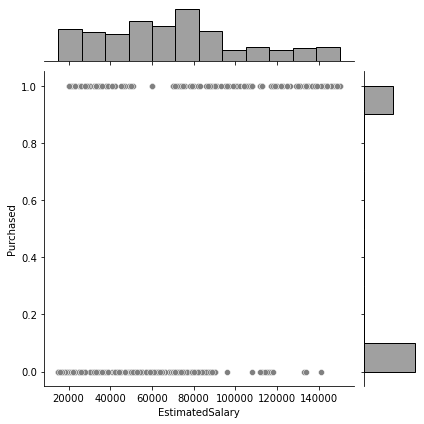

In [5]:
# sns.jointplot 활용한 시각화. x='EstimatedSalary', y='Purchased'

sns.jointplot(x='EstimatedSalary', y='Purchased', data = df, color = 'gray')

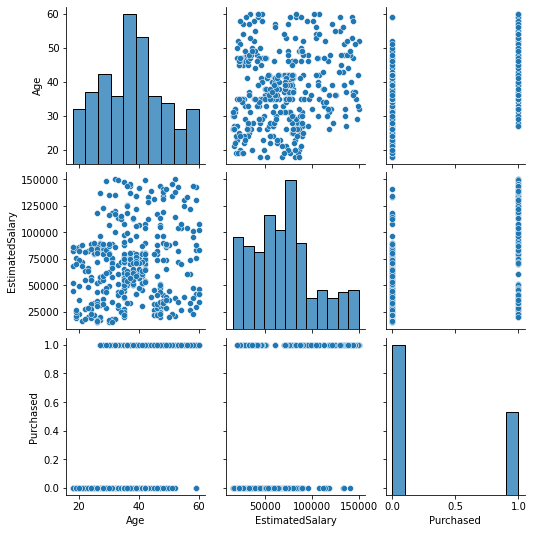

In [6]:
# sns.pairplot()

sns.pairplot(df)

### Step3: Define Train set and Test Set

In [7]:
# X에 -1번째 column까지 할당
# y에 -1번째 column을 할당

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
# split train set and test set

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test 할당. test_size=0.2, random_state=0


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Step4: Train Model

In [9]:
# from sklearn.preprocessing import StandardScaler
# sc로 StandardScaler() 스케일러 오브젝트 할당
# 스케일링 할 X_train으로 fit

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [10]:
# sc를 로 X_train, X_test 를 transform

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# import math
# n_neighbors = int(sqrt(train set sample number))

import math
K = int(math.sqrt(X_train.shape[0]))
K

17

In [12]:
# from sklearn.linear_model import KNeighborsClassifier
# classifier에 KNeighborsClassifier 할당
# X_train으로 classifier에 fit
# weighted knn -> param: weights='distance'

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = K, metric = 'minkowski', p = 2)  # metirc= minkowski, p=2 :same as Euclidean distance
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

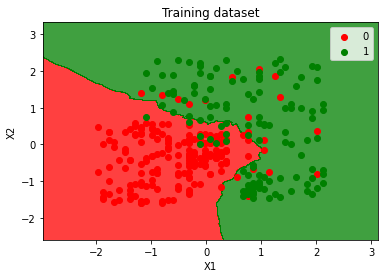

In [13]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

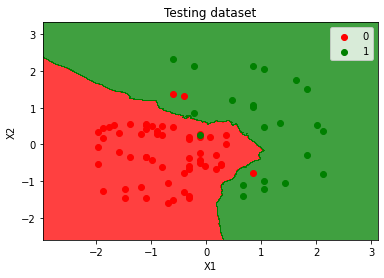

In [14]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Testing dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [15]:
# classifier score(mean accuracy on the given test data and labels) on train set.

classifier.score(X_train, y_train)

0.909375

In [16]:
# classifier score(mean accuracy on the given test data and labels) on test set

classifier.score(X_test, y_test)

0.95

### Step5: Predict value

#### 실험 결과 케이스
- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답).
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답). Type 1 Error.  
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답). Type 2 Error.  
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답). 

180 19 10 111


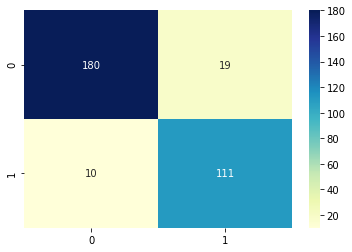

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# train set 
y_predict_train = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

55 3 1 21


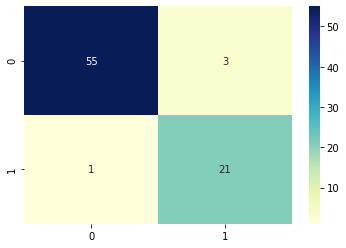

In [18]:
# test set
y_predict_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

In [19]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



#### 실험 결과 케이스
- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답).
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답). Type 1 Error.  
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답). Type 2 Error.  
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답). 

#### Classification Metrics
- precision(정밀도): $\dfrac{TP}{TP + FP}$  
  "모델"이 정답이라고 예측한 것 중에서 "실제로" 정답인 비율.
- recall: $\dfrac{TP}{TP + FN}$  
  "실제로" 정답인 것 중에서 "모델"이 정답인 비율.
- f1-score: $\dfrac{2}{\dfrac{1}{precision} + \dfrac{1}{recall}}$  
  precision, recall 조화평균.  
  두 metric의 평균값.큰 비중 점수가 가지는 bias를 줄임.


#### classification_report
- macro average: averaging the unweighted mean per label
- weighted average: averaging the support-weighted mean per label

---

## Exercise

Framingham Heart study dataset

#### Content

Dependent variable
- diabetes: 0 = No; 1 = Yes


Independent variables
- male: 0 = Female; 1 = Male
- age: Age at exam time.
- education: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college
- currentSmoker: 0 = nonsmoker; 1 = smoker
- cigsPerDay: number of cigarettes smoked per day (estimated average)
- BPMeds: 0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications
- prevalentStroke: prevalentHyp
- totChol: mg/dL
- sysBP: mmHg
- diaBP: mmHg
- BMI: Body Mass Index calculated as: Weight (kg) / Height(meter-squared)
- heartRate: Beats/Min (Ventricular)
- glucose: mg/dL
- TenYearCHD

reference.
https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

### Step1: Load Dataset

In [20]:
# 'framingham.csv' 파일 읽기 pd.read_csv()
# df shape 확인 

df = pd.read_csv('framingham.csv')
df.shape

(4240, 16)

In [21]:
# df head 행 보기

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [22]:
# df info 보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [23]:
# df descriptive statistics

df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [24]:
# drop null data dropna(how='any', axis=0)

df = df.dropna(how='any', axis=0)
df.shape

(3658, 16)

### Step2: Visualize Dataset

<AxesSubplot:>

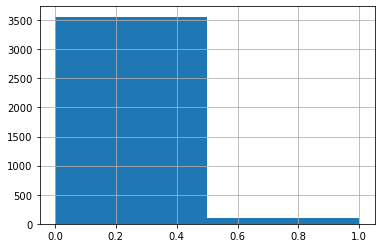

In [25]:
# histogram

df['diabetes'].hist(bins=2)

In [26]:
# value counts()

df.diabetes.value_counts()

0    3559
1      99
Name: diabetes, dtype: int64

### Step3: Define Train set and Test Set

In [27]:
# X에 diabetes를 제외한 column까지 할당. axis=1 기준
# y에 diabetes column을 할당

X = df.drop('diabetes', axis=1)
y = df.loc[:, 'diabetes']

In [28]:
# split train set and test set

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test 할당. test_size=0.2, random_state=0


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Step4: Train Model

In [29]:
# from sklearn.preprocessing import StandardScaler
# sc로 StandardScaler() 스케일러 오브젝트 할당
# 스케일링 할 X_train으로 fit

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [30]:
# sc를 로 X_train, X_test 를 transform

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [31]:
# from sklearn.linear_model import KNeighborsClassifier
# Classifier에 KNeighborsClassifier 할당
# X_train으로 classifier에 fit
# weighted knn -> param: weights='distance'

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)  # same as Euclidean distance
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
# classifier score(mean accuracy on the given test data and labels) on train set.

classifier.score(X_train, y_train)

0.9832535885167464

In [33]:
# classifier score(mean accuracy on the given test data and labels) on test set

classifier.score(X_test, y_test)

0.9849726775956285

### Step5: Predict value

#### 실험 결과 케이스
- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답).
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답). Type 1 Error.  
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답). Type 2 Error.  
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답). 

2849 1 48 28


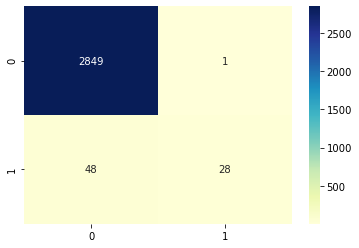

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# train set 
y_predict_train = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

709 0 11 12


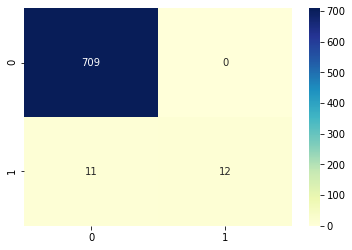

In [35]:
# test set
y_predict_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

In [36]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       709
           1       1.00      0.52      0.69        23

    accuracy                           0.98       732
   macro avg       0.99      0.76      0.84       732
weighted avg       0.99      0.98      0.98       732



#### 실험 결과 케이스
- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답).
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답). Type 1 Error.  
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답). Type 2 Error.  
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답). 

#### Classification Metrics
- precision(정밀도): $\dfrac{TP}{TP + FP}$  
  "모델"이 정답이라고 예측한 것 중에서 "실제로" 정답인 비율.
- recall: $\dfrac{TP}{TP + FN}$  
  "실제로" 정답인 것 중에서 "모델"이 정답인 비율.
- f1-score: $\dfrac{2}{\dfrac{1}{precision} + \dfrac{1}{recall}}$  
  precision, recall 조화평균.  
  두 metric의 평균값.큰 비중 점수가 가지는 bias를 줄임.


#### classification_report
- macro average: averaging the unweighted mean per label
- weighted average: averaging the support-weighted mean per label